In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


according to data desription age = rings+1.5

In [5]:
df['age'] = df['Rings']+1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


there are no missing values

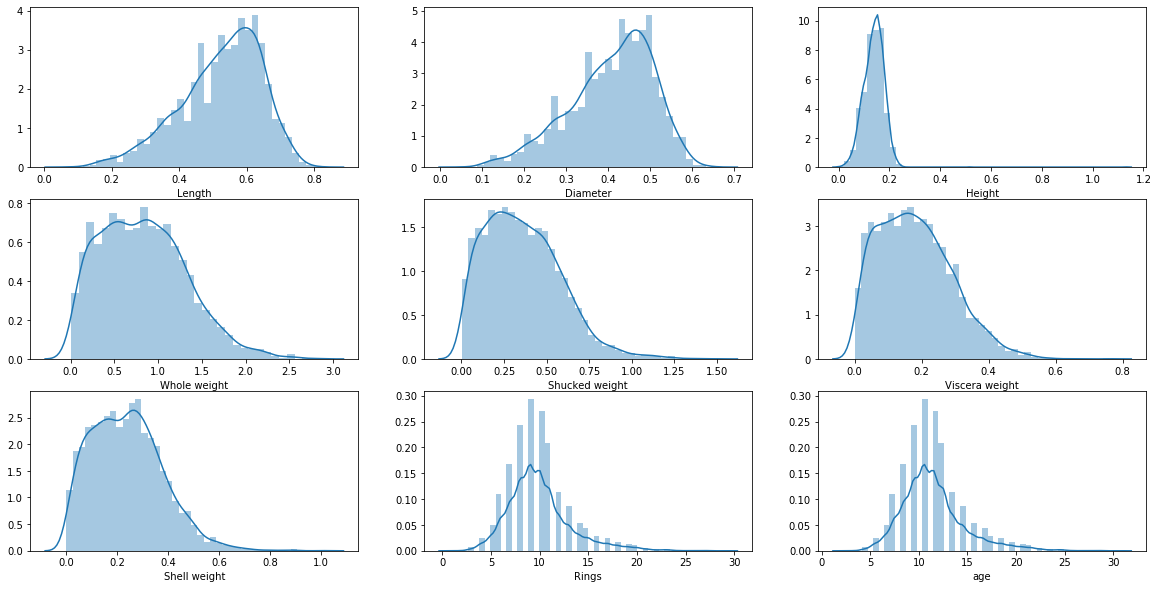

In [6]:
fig = plt.figure(figsize=(20,10))
l = list(df.columns)[1:]
for i in range(len(l)):
    ax = fig.add_subplot(3,3,i+1)
    sns.distplot(df[l[i]])


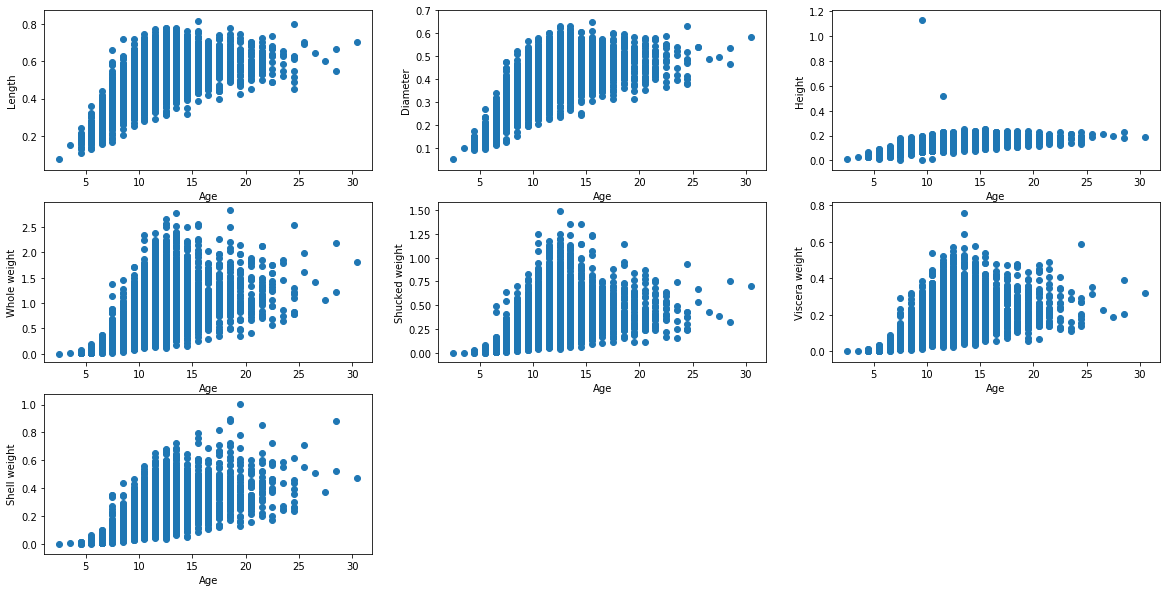

In [7]:
fig = plt.figure(figsize=(20,10))
l = list(df.columns)[1:-2]

for i in range(len(l)):
    ax = fig.add_subplot(3,3,i+1)
    plt.scatter(y=l[i],x='age',data=df)
    plt.ylabel(l[i])
    plt.xlabel('Age')

we can see many linear relationships

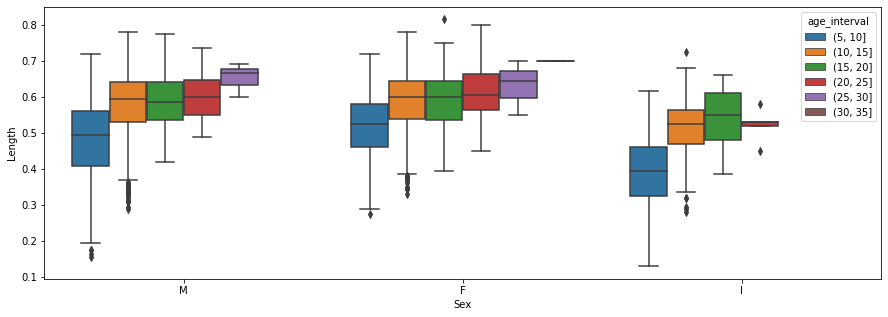

In [8]:
plt.figure(figsize=(15,5))
df['age_interval'] = pd.cut(df.age,[5,10,15,20,25,30,35])
sns.boxplot(x='Sex',hue='age_interval',y='Length',data=df)

- males aged between 25 to 30 have high length
- lesbians aged 5-10 have very small length

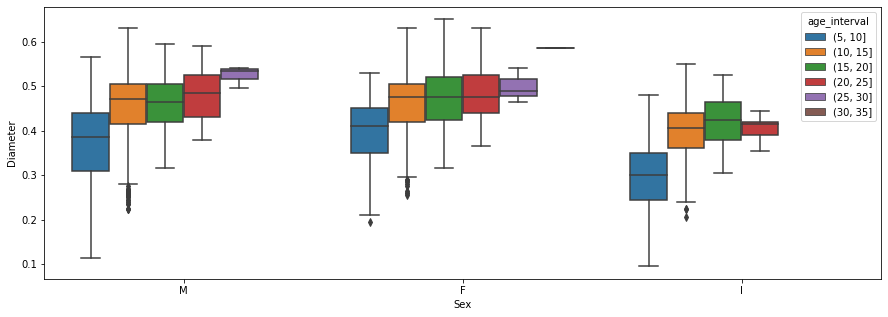

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Sex',hue='age_interval',y='Diameter',data=df)

- diameter of males and females with age group 25-30 have high diameter

In [10]:
#before analyzing height lets remove outliers
df[df['Height']>0.3]


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age,age_interval
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10,11.5,"(10, 15]"
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8,9.5,"(5, 10]"


In [11]:
df[df['Viscera weight']>0.6]


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age,age_interval
1762,M,0.770,0.62,0.195,2.5155,1.1155,0.6415,0.642,12,13.5,"(10, 15]"
1763,M,0.775,0.63,0.250,2.7795,1.3485,0.7600,0.578,12,13.5,"(10, 15]"


In [12]:
df[df['Shucked weight']>1.35]


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age,age_interval
1209,F,0.780,0.630,0.215,2.657,1.488,0.4985,0.5860,11,12.5,"(10, 15]"
1528,M,0.725,0.575,0.240,2.210,1.351,0.4130,0.5015,13,14.5,"(10, 15]"


In [13]:
df[df['Shell weight']>.89]


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age,age_interval
163,F,0.725,0.560,0.21,2.1410,0.6500,0.398,1.005,18,19.5,"(15, 20]"
891,M,0.730,0.595,0.23,2.8255,1.1465,0.419,0.897,17,18.5,"(15, 20]"


In [14]:
df[df['Whole weight']>2.7]


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age,age_interval
891,M,0.730,0.595,0.23,2.8255,1.1465,0.419,0.897,17,18.5,"(15, 20]"
1763,M,0.775,0.630,0.25,2.7795,1.3485,0.760,0.578,12,13.5,"(10, 15]"


In [15]:
df = df.drop(df[df['Height']>0.3].index)
df = df.drop(df[df['Viscera weight']>0.3].index)
df = df.drop(df[df['Shucked weight']>0.3].index)
df = df.drop(df[df['Shell weight']>0.3].index)
df = df.drop(df[df['Whole weight']>0.3].index)

###### plt.figure(figsize=(15,5))
sns.boxplot(x='Sex',hue='age_interval',y='Height',data=df)

- females aged between 25-30 have high height

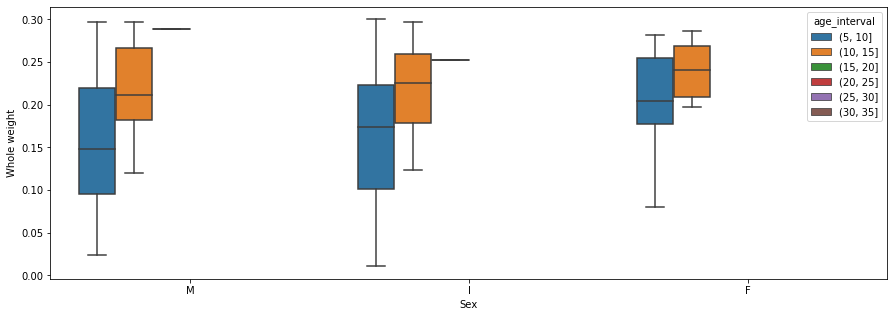

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Sex',hue='age_interval',y='Whole weight',data=df)

- males and females of age 25-30 have more weight
- lesbians are having less weight compared to others

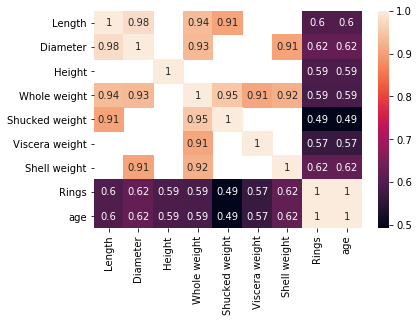

In [17]:
corr = df.corr()

sns.heatmap(corr[(corr>0.9) | (corr<0.7)],annot=True)

- length-diameter , shucked-whole weight ,viscera-whole weight are very highly correlated values
- Age is least correlated with shucked weight and much with shell weight followed by height,diameter and length


### Machine learning

In [18]:
#now lets transform our catagorical feature
df = df.drop(['age','age_interval'],axis=1)
df = pd.get_dummies(df)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
16,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7,0,1,0
18,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,7,0,0,1
20,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.075,11,0,0,1


In [19]:
from sklearn.model_selection import train_test_split

x = df.drop('Rings',axis=1)

y = df['Rings']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
model = LinearRegression()

model.fit(x_train,y_train)

predict = model.predict(x_test)

print('Accuracy score',model.score(x_test,y_test))
# print('Accuracy after 10 fold cross validations',cross_validate(model,x,y,cv=10,scoring='scoring'))

Accuracy score 0.4982334692989818


### Classification

In [21]:
bins = [0,8,10,df['Rings'].max()]

group_names=['young','medium','old']

df['Rings'] = pd.cut(df['Rings'],bins,labels=group_names)

df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,young,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,young,0,1,0
16,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,young,0,1,0
18,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,young,0,0,1
20,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.075,old,0,0,1


In [22]:
dict = {'young':0,'medium':1,'old':2}
df['Rings'] = df['Rings'].map(dict)

x = df.drop(['Rings'], axis = 1)
y = df['Rings']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

df.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1,0
16,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,0,0,1,0
18,0.365,0.295,0.080,0.2555,0.0970,0.0430,0.100,0,0,0,1
20,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.075,2,0,0,1


- KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(x_train,y_train)

predict = model.predict(x_test)

print('Accuracy score',accuracy_score(y_test,predict))
print('Accuracy score after 10 folds cross validation',cross_val_score(model,x,y,cv=10,scoring='accuracy').mean())

Accuracy score 0.9015151515151515
Accuracy score after 10 folds cross validation 0.8654420411312422
